## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. ~~Download a small (5-15) set of variables of interest.~~
2. ~~Write a short description of the data you chose, and why. (1 page)~~
3. ~~Load the data using Pandas.~~ ~~Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.~~
4. ~~Produce some numeric summaries and visualizations. (1-3 pages)~~
5. ~~Describe your findings in 1-2 pages.~~
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

### part one

In [1]:
# !pip install fastparquet

In [2]:
# making my life fucking easier 
import pandas as pd
#
var_list = ['year', 'id', 'ballot', 'wrkstat', 'rincome', 'hrs2', 'famwkoff', 'moredays', 'happy', 'life','nihilism','trust'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN   None  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN   None  270.0      44.0   
3  1972   4  working full time   NaN   NaN   None    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else    None  ...      None     None     None      NaN        NaN   
1  someone else    None  ...      None     None     None      NaN        NaN   
2  someone else    None  ...      None     None     None      NaN        NaN   
3  someone else    None  ...      None     None     None      NaN        NaN   
4  someone else    None  ...      None     None     None      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

### part two
   The GSS offered almost too many variable options, which compelled me to investigate something nicher than oft-discussed topics such as racial income disparities or the urban-rural divide. After clicking on random entries through the endless pages of variable descriptions, I settled on exploring the correlation between the nature of one's job and indicators of hopelessness in oneself and other people. I do not know any study that conducted such an investigation (though they definitely exist), and I do not have enough background knowledge to feel confident about formulating a hypothesis on the topic. My findings will likely be useless, as my data is not stratified by occupation, which is probably a confounding variable; but I'm afforded the space here to do whatever I want, and experimentation is fun. The GSS hides a massive volume of interesting data that this codebook leaves untouched, but when you're working on a deadline, you can only reserve so much time for curiosity. 

   First, I wanted to get a sense of how well jobs treated respondents, so I looked at whether they were paid sufficiently and the degree to which they were overworked. Variables I included as job characteristics include `rincome` (the respondent's income), `hrs2` (the number of hours they work per week), `famwkoff` (the difficulty of taking time off), and `moredays` (the days people have to work overtime in a month). The selection of variables is intended to be general, yet telling of particular work environments; for example, `famwkoff` gives no indication of a respondent's occuptation, but it can provide hints about the culture of their workplace. Other variables also provided revealing information—such as whether people gossiped at their job—but they were only available for one or a few years of the survey, so I decided to leave them out. 

   To gauge respondents' despair in themselves, I selected the variables `happy` (self-reported happiness), `life` (whether life is exciting or dull), and `nihilism` (whether life served a purpose). Low perceived happiness would demonstrate that a respondent feels dissatisfied with their day-to-day life; meanwhile, the assertion that life is dull might indicate that one feels unfulfilled or drained by their work. Meanwhile, a belief that life serves know purpose might likewise come from pessimism about one's ability to accomplish anything meaningful. I know that some people might accept nihilism as a philosophical position and don't necessarily arrive to the conclusion because they feel hopeless; looking at a respondent's answers for `happy` and `life` could provide insight on the nature of their nihilism. The variable I've chosen as an indicator of despair in others is `trust` (trust in other people). Mistrust would indicate that one defaults to negative assumptions about others' intentions.

   I know that this assessment gets sort of existential, and I might be reaching  beyond "social determinants of mental health," but I don't know, gauging despair seemed like an interesting thing to do. 

### part three

In [3]:
# loading in the data
selected_data = pd.read_csv("./selected_gss_data.csv")
selected_data.head()

/tmp/ipykernel_3180/697146975.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  selected_data = pd.read_csv("./selected_gss_data.csv")


,year,id,ballot,wrkstat,rincome,hrs2,famwkoff,moredays,happy,life,nihilism,trust
0,1972,1,NaN,working full time,NaN,NaN,NaN,NaN,not too happy,NaN,NaN,depends
1,1972,2,NaN,retired,NaN,NaN,NaN,NaN,not too happy,NaN,NaN,can trust
2,1972,3,NaN,working part time,NaN,NaN,NaN,NaN,pretty happy,NaN,NaN,can't be too careful
3,1972,4,NaN,working full time,NaN,NaN,NaN,NaN,not too happy,NaN,NaN,can't be too careful
4,1972,5,NaN,keeping house,NaN,NaN,NaN,NaN,pretty happy,NaN,NaN,can't be too careful


In [4]:
# investigating shapes
selected_data.shape

(72390, 12)

In [5]:
# investigating data types
selected_data.dtypes
# categorical: ballot, wrkstat, rincome, famwkoff, happy, life, nihlism, trust.
# numeric: id, year, hours, moredays. 

# ^ i made the mistake in my cleaning at some point thinking that income was supposed to be numeric...
# ...but it denoted an income BRACKET, not a value 

year          int64
id            int64
ballot       object
wrkstat      object
rincome      object
hrs2        float64
famwkoff     object
moredays    float64
happy        object
life         object
nihilism     object
trust        object
dtype: object

In [6]:
# it might be a good idea to clean our categorical and numeric values separately
selected_data_categoricals = ["ballot", "wrkstat", "famwkoff", "rincome",'happy', 'life','nihilism','trust']
selected_data_numeric = ["id", "year", "hrs2", "moredays"]

In [7]:
# seeing if there's anything WEIRD that needs to be purged from our...
# ...categoricals. 
for i in selected_data_categoricals:
    print(selected_data[i].value_counts())
    print("____________________________________")
# nothing bizarre

ballot
ballot b    16477
ballot c    16281
ballot a    16239
ballot d     1518
Name: count, dtype: int64
____________________________________
wrkstat
working full time                                                             35267
retired                                                                       10886
keeping house                                                                 10764
working part time                                                              7430
unemployed, laid off, looking for work                                         2621
in school                                                                      2187
other                                                                          1643
with a job, but not at work because of temporary illness, vacation, strike     1556
Name: count, dtype: int64
____________________________________
famwkoff
not at all hard    3913
not too hard       2871
somewhat hard      1577
very hard           915
Name: coun

In [8]:
# i will print out summary statistics for all numeric variables...
# ...to see if there's anything weird produced by a '9999' or something. 
for i in selected_data_numeric:
    print(selected_data[i].describe())
    print("_______________________")
# it does not appear so 

# at this point i am satisfied with the cleanliness of the data now. 
# maybe i need to consider how to handle NaNs or something at this point...
# ...but we're at the EDA stage so maybe not yet. 

count    72390.000000
mean      1241.796395
std        912.273245
min          1.000000
25%        534.000000
50%       1083.000000
75%       1722.000000
max       4510.000000
Name: id, dtype: float64
_______________________
count    72390.000000
mean      1997.715541
std         15.109995
min       1972.000000
25%       1985.000000
50%       1998.000000
75%       2010.000000
max       2022.000000
Name: year, dtype: float64
_______________________
count    1401.000000
mean       39.206281
std        13.549101
min         0.000000
25%        35.000000
50%        40.000000
75%        45.000000
max        89.000000
Name: hrs2, dtype: float64
_______________________
count    9145.000000
mean        5.500055
std         7.537136
min         0.000000
25%         0.000000
50%         2.000000
75%         7.000000
max        31.000000
Name: moredays, dtype: float64
_______________________


### part four

In [9]:
# summary stats stuff!11!1!1!!11!1

# what is the proportion of our nihilists, roughly 
((selected_data["nihilism"].value_counts()) / len(selected_data["nihilism"].dropna()))*100
# VERY few 

nihilism
strongly disagree             56.295695
disagree                      35.194963
neither agree nor disagree     5.381803
agree                          2.173030
strongly agree                 0.954509
Name: count, dtype: float64

In [10]:
# what about the proportion of trust nobody-ers? 
(selected_data["trust"].value_counts() / len(selected_data["trust"].dropna()))*100
# a slight majority of people say they can't be too careful 

trust
can't be too careful    58.337846
can trust               36.939376
depends                  4.722778
Name: count, dtype: float64

In [11]:
# the proportion of people who find life dull
((selected_data["life"].value_counts()) / len(selected_data["life"].dropna()))*100
# most people do NOT find life dull

life
routine     48.715051
exciting    46.251384
dull         5.033565
Name: count, dtype: float64

In [12]:
# the proportion of unhappy people 
((selected_data["happy"].value_counts()) / len(selected_data["happy"].dropna()))*100
# most people are relatively happy 

happy
pretty happy     55.946322
very happy       30.160679
not too happy    13.892999
Name: count, dtype: float64

In [13]:
# importing packages for visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns 

<Axes: xlabel='famwkoff', ylabel='hrs2'>

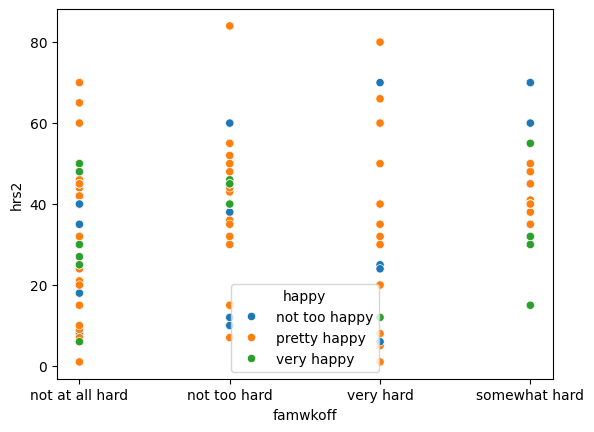

In [14]:
# ease of taking life off vs. hours worked a week, stratified by happiness.
sns.scatterplot(data=selected_data, x="famwkoff", y="hrs2",hue="happy")
# a handful of people are not too happy, seems like the prime strugglers are those...
# ...working a lot who find it 'somewhat hard' to take off work. 
# but the correlation is not looking very strong, there are no patterns that...
# ...jump out at me. 

<Axes: xlabel='famwkoff', ylabel='hrs2'>

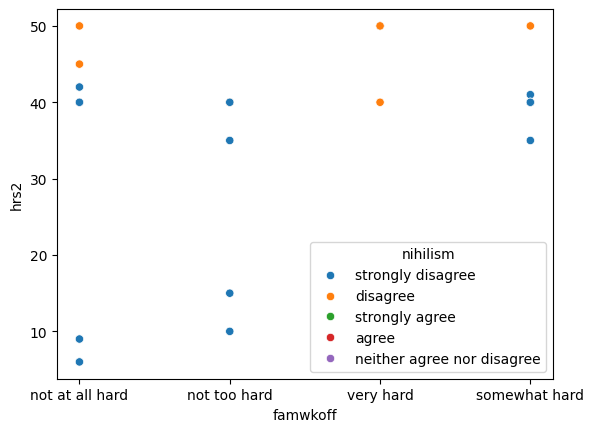

In [15]:
# same with nihilism
sns.scatterplot(data=selected_data, x="famwkoff", y="hrs2",hue="nihilism")
# not enough data but it's still incredibly striking to me that there...
# ...are no nihilists

<Axes: xlabel='famwkoff', ylabel='hrs2'>

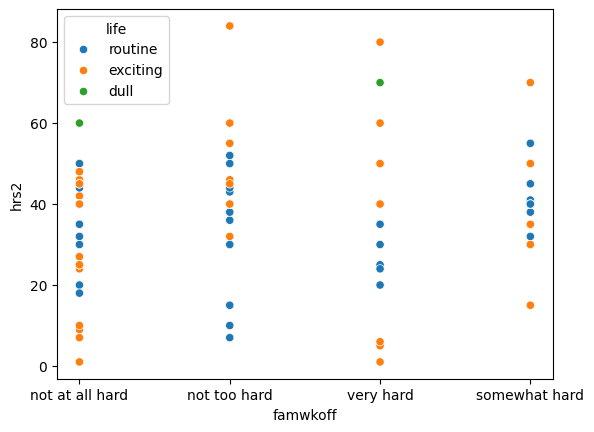

In [16]:
# ease of taking life off vs. hours worked a week, stratified by whether life is...
# ...routine exciting or dull. 
sns.scatterplot(data=selected_data, x="famwkoff", y="hrs2",hue="life")
# why does nobody think life is dull? 

<Axes: xlabel='famwkoff', ylabel='moredays'>

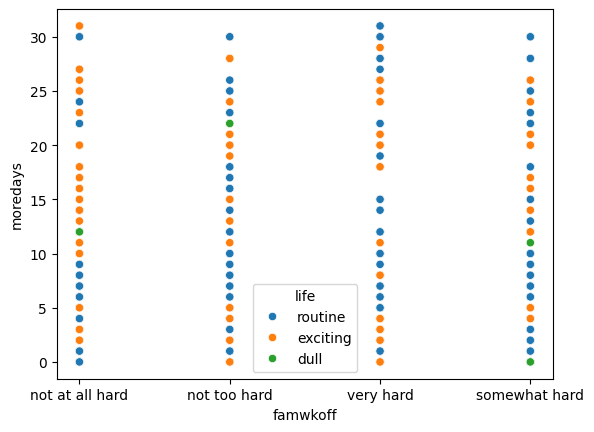

In [17]:
# ability to take work off vs. overtime stratified by whether life is exciting...
# ...or dull
sns.scatterplot(data=selected_data, x="famwkoff", y="moredays",hue="life")
# what's interesting to me is that people who find it easy to take work off...
# ...are often working overtime. 
# they must be incredibly WILLING to do their work. 

# it appears as if more people who find it 'not hard at all' to take work off...
# ...find work exciting. 

# better workplaces possibly? 

<Axes: xlabel='famwkoff', ylabel='moredays'>

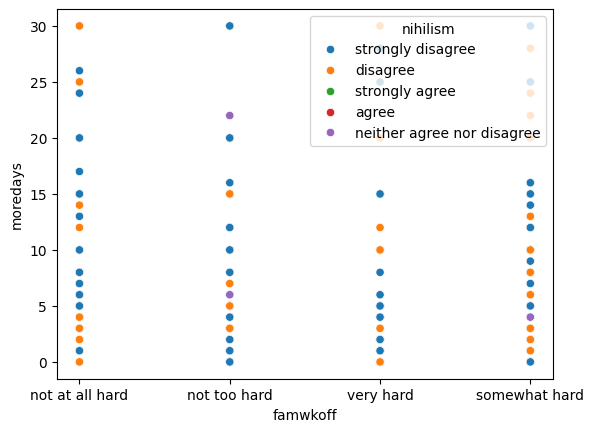

In [18]:
# ability to take weeks off vs. overtime, stratified by nihilism
sns.scatterplot(data=selected_data, x="famwkoff", y="moredays",hue="nihilism")
# not enough data here tbh

<Axes: xlabel='moredays', ylabel='rincome'>

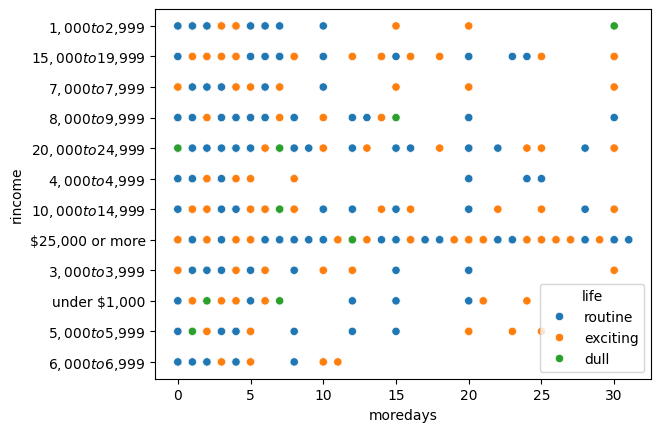

In [19]:
# income vs. overtime, stratified by life satisfaction
sns.scatterplot(data=selected_data, x="moredays", y="rincome",hue="life")
# wow i CANNOT read this!

In [20]:
# the income viz was turning out very ugly and difficult to parse
# so im gonna crosstabulate
pd.crosstab(selected_data.rincome.dropna(), selected_data.life, normalize=True).sort_values(by=["dull"], ascending=False)
# the higher your income, the more your life is dull (unless you're literally impoverished)!

life,dull,exciting,routine
rincome,,,
"$25,000 or more",0.007766,0.225695,0.189189
"$10,000 to $14,999",0.004340,0.055463,0.063799
"$15,000 to $19,999",0.003692,0.044271,0.047811
"$20,000 to $24,999",0.003159,0.046936,0.049258
"under $1,000",0.002855,0.014161,0.013894
"$1,000 to $2,999",0.002170,0.021622,0.022155
"$8,000 to $9,999",0.001941,0.020746,0.021812
"$4,000 to $4,999",0.001561,0.012372,0.012714
"$3,000 to $3,999",0.001408,0.013856,0.015455


In [21]:
# cross tabulating by income and happiness
pd.crosstab(selected_data.rincome.dropna(), selected_data.happy, normalize=True).sort_values(by=["not too happy"], ascending=False)
# very similar pattern

happy,not too happy,pretty happy,very happy
rincome,,,
"$25,000 or more",0.042329,0.246139,0.133836
"$10,000 to $14,999",0.015598,0.073499,0.034797
"$15,000 to $19,999",0.012351,0.055365,0.028000
"$20,000 to $24,999",0.011743,0.058054,0.027213
"$1,000 to $2,999",0.006797,0.027848,0.012605
"$8,000 to $9,999",0.005960,0.025996,0.012808
"under $1,000",0.005706,0.017474,0.009587
"$5,000 to $5,999",0.004870,0.015445,0.007533
"$3,000 to $3,999",0.004464,0.018692,0.008522


In [22]:
# cross tabulating by income and happiness
pd.crosstab(selected_data.rincome.dropna(), selected_data.trust, normalize=True).sort_values(by=["can't be too careful"], ascending=False)
# very similar pattern, and the 25k or more scorers are no small outlier. 

trust,can trust,can't be too careful,depends
rincome,,,
"$25,000 or more",0.179282,0.207636,0.021265
"$10,000 to $14,999",0.045390,0.076190,0.004104
"$15,000 to $19,999",0.036644,0.060106,0.004643
"$20,000 to $24,999",0.037639,0.057992,0.003979
"$1,000 to $2,999",0.015793,0.030592,0.002156
"$8,000 to $9,999",0.014550,0.028519,0.001948
"under $1,000",0.011524,0.021348,0.001119
"$3,000 to $3,999",0.010114,0.020685,0.000871
"$5,000 to $5,999",0.008581,0.017949,0.001451


In [23]:
# cross tabulating by income and happiness
pd.crosstab(selected_data.rincome.dropna(), selected_data.nihilism, normalize=True).sort_values(by=["agree"], ascending=False)
# same freaking pattern!!!!! what is wrong with well-to-do people?!

nihilism,agree,disagree,neither agree nor disagree,strongly agree,strongly disagree
rincome,,,,,
"$25,000 or more",0.006915,0.159039,0.024695,0.002963,0.320711
"$10,000 to $14,999",0.003951,0.037208,0.006585,0.001646,0.051696
"$15,000 to $19,999",0.002634,0.036549,0.003622,0.000329,0.051366
"$20,000 to $24,999",0.002634,0.037208,0.008232,0.000659,0.057293
"$1,000 to $2,999",0.000988,0.008232,0.001317,0.000659,0.017451
"$5,000 to $5,999",0.000988,0.008561,0.000988,0.000000,0.011195
"$3,000 to $3,999",0.000659,0.009878,0.002305,0.000988,0.013171
"$4,000 to $4,999",0.000659,0.003951,0.001646,0.000000,0.010537
"$8,000 to $9,999",0.000659,0.013171,0.001646,0.000329,0.015805


### part five

A few of my findings are surprising, as some variables were not as strongly correlated as I thought. I expected to see strong correlations between "despair" variables and difficulty to take off work, as I supposed that less forgiving employers and occupations would lead to greater stress. People who found it "very hard" to take time off were less likely to say they were *very* happy, but they were *not more likely* to say they were *unhappy*; most seemed moderately content. On my scatterplots showcasing correlations between nihilism and work characteristics, very few data points appeared, so I do not think we have enough data on nihilism to draw conclusions about how it is affected by work.   

The dearth of despairing respondents also surprised me. Out of dozens of people featured in my weeks-off-to-hours-worked diagram, only *six* said their life was dull, and *no* respondents on *any* of my scatterplots agreed that life served no purpose. Though my calculated percentages revealed that *some* people indeed thought they lived purposeless lives, their responses comprised a tiny minority of my data. Unhappy respondents were more common—they comprised about 14% of respondents to the "happiness" question—but most participants regardless said they were content. My friends in the workforce frequently experience distress or burnout, which is why I found the lack of emotionally unhealthy respondents odd. Then again, my friend group is self-selecting, as we are all in our late teens to our mid twenties; those of us who *do* have a job are just entering the workforce or are uncertain about careers. 

I am not at all surprised that more well-to-do people score higher on "despair" metrics. My mother was involved with a study where she helped investigate correlations between race and suicide, and it shocked me at the time that (according to the study) white people had higher suicide rates than all demographics except Native Americans. Her hypothesis was that privilege made them less resilient—in other words, they were likely unimmune to degree of hardship that other demographics so often endured. The hypothesis likely applies to the wealthier people on the GSS, but other factors may be involved, such as survey bias (the cultures of some people may stigmatize poor mental health) or the occupations of respondents (a sociable waiter probably enjoys their job more than a lawyer forced into the field by their parents).  

If I were to redo assignment study, I might stratify the data by demographic characteristics such as race or gender, as adults in my life older than me are often dissatisfied with their racist or sexist work environments. I also must bear in mind that unforgiving and emotionally demanding work does not always leave people dissatsified or unfulfilled; for example, my mother is a neonatologist who loves her job, even if she is often in the hospital overnight and has to watch babies die (and it is difficult to have a more exhausting job than *that!*). 

### part...six? 

i have so much stuff to turn in if i dont have to do this i wont bother with it lol